# In-lecture exercise for teleportation circuit

In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector


C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


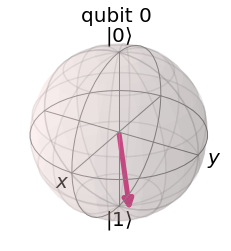

In [2]:
  # We want to teleport a random quantum state:
psi = random_statevector(2)
plot_bloch_multivector(psi)

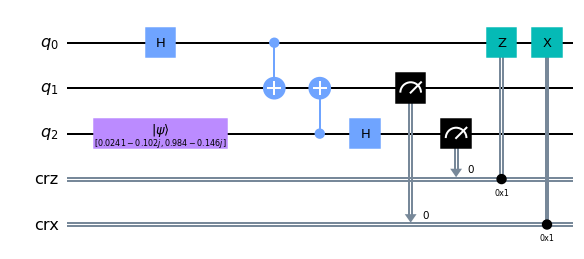

In [3]:
  # Create the "hardware" of our quantum computer
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)  # Putting them all together in one "circuit"
teleportation_circuit.initialize(psi, 2)  # Initialise the state of the qubit that we wish to teleport
  # Apply Hadamard gate to the first qubit (0)
teleportation_circuit.h(0)
  # Apply cNOT gate with first as a control
teleportation_circuit.cx(0,1)
  # At this point, we have a bell state.
  # Now we apply the reverse (decoder), but to the second and third qubits
teleportation_circuit.cx(2,1)
teleportation_circuit.h(2)  # Q: Is this the only order we can apply this? - A: no, depends which qubit we want to teleport onto
  # Now Bob measures both his qubits (1 and 2) and sends results to Alice (0)
teleportation_circuit.measure(2,0)  # Measure qubit 1 and send the result to "classical bit" 0
teleportation_circuit.measure(1,1)  # Measure qubit 2 and send the result to "classical bit" 1
  # Now Alice applies gates depending on Bobs outcomes
teleportation_circuit.z(0).c_if(crz, 1) # Apply gates if the registers require, (this is to "extract" the teleported information)
teleportation_circuit.x(0).c_if(crx, 1)
teleportation_circuit.draw('mpl')

After each gate in the above drawing, what is the state of the three qubits, assuming the initial state is 000, (i.e. ignoring the purple gate)


Solutions:
After H1 the state becomes:             (|0> + |1>)|0>|0>
After the first cNOT the state becomes: (|00> + |11>)|0>
After the second cNot the state becomes:(|00> + |11>)|0>
After H2 the state becomes:    (|00> + |11>)(|0> + |1>)=
= |000> + |001> + |110> + |111>


C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


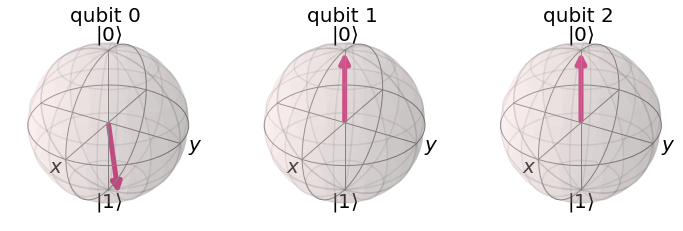

In [4]:
sim = Aer.get_backend('qasm_simulator')  # Define our simulation method
teleportation_circuit.save_statevector() # Tell the simulation to save the state vector as we run it
result = sim.run(teleportation_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(teleportation_circuit)
teleportation_circuit.reset(qubit=qr)  # Reset the circuit ready for the next run
plot_bloch_multivector(out_vector)


C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


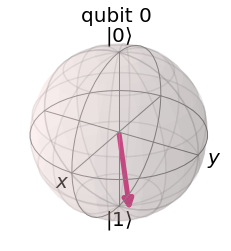

In [5]:
plot_bloch_multivector(psi)

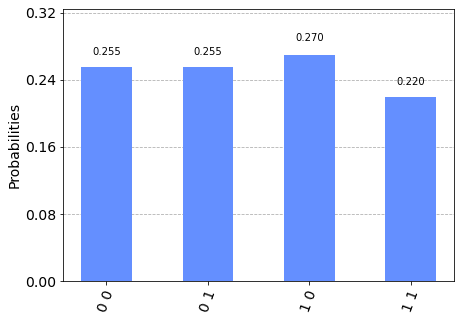

In [6]:
plot_histogram(counts)

# Post lecture exercise - Super Dense Coding